# Práctica 8

In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import math
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

## Ejercicio 1

### Pregunta B

In [2]:
a = 0.05
va = scipy.stats.norm(0,1)
z = va.ppf(1-(a/2))
xRaya = 25.01
var = 0.36
sd = math.sqrt(var)
n = 20

intervalo = (xRaya - (z*sd/math.sqrt(n)),(xRaya + (z*sd/math.sqrt(n))))
intervalo

(24.74704323782703, 25.272956762172974)

In [3]:
def getIntervaloParaMuConVar(alfa, var, mediaMuestral, n):
    va = scipy.stats.norm(0,1)
    z = va.ppf(1-(alfa/2))
    sd = math.sqrt(var)
    return (mediaMuestral - (z*sd/math.sqrt(n)),(mediaMuestral + (z*sd/math.sqrt(n))))

In [4]:
getIntervaloParaMuConVar(a,var,xRaya,20)

(24.74704323782703, 25.272956762172974)

In [5]:
nDeseado = 0.05
(2*z*sd/0.05)**2

2212.680280719816

In [6]:
# Prueba inciso ii
i = getIntervaloParaMuConVar(a,var,xRaya,2213)
i[1]-i[0]

0.049996388038536566

In [7]:
def nParaLograrLongitudMuConVar(alfa, var, l):
    va = scipy.stats.norm(0,1)
    z = va.ppf(1-(alfa/2))
    sd = math.sqrt(var)
    return (2*z*sd/l)**2

In [8]:
# Inciso iii
nParaLograrLongitudMuConVar(0.05,0.6,0.05)

3687.8004678663597

In [9]:
# Prueba
i = getIntervaloParaMuConVar(a,0.6,xRaya,3688)
i[1]-i[0]

0.049998647404876806

## Ejercicio 2

In [10]:
va = scipy.stats.norm(1,4)
res = va.rvs(2)

In [11]:
nReps = 1000
nSample = 500
tObs = []
for x in range(nReps):
    sample = va.rvs(nSample)
    tObs.append(np.mean(sample))

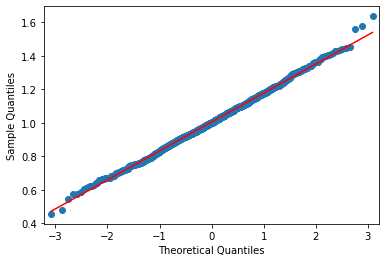

In [12]:
# QQPlot - Muy cercano a la normal
qqplot(np.array(tObs),line="s")
plt.show()

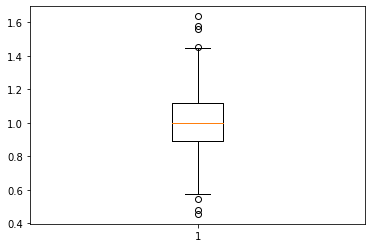

In [13]:
# BoxPlot tambien muy parecido a la normal
plt.boxplot(tObs)
plt.show()

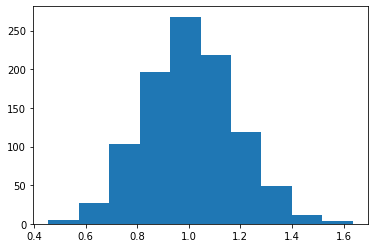

In [14]:
plt.hist(tObs)
plt.show()

## Ejercicio 3

### Pregunta B

In [15]:
# Esta es para calcular el desvio muestra
datos = [0,0,0]
sdMuestral = np.std(datos,ddof=1)
def getIntervaloParaMuSinVar(alfa, sdMuestral, mediaMuestral, n):
    va = scipy.stats.t(df=n-1)
    z = va.ppf(1-(alfa/2))
    sd = sdMuestral
    return (mediaMuestral - (z*sd/math.sqrt(n)),(mediaMuestral + (z*sd/math.sqrt(n))))

In [16]:
intervalo = getIntervaloParaMuSinVar(0.05,0.76,25.01,20)
intervalo

(24.65430905112087, 25.365690948879134)

In [17]:
# Simulación para ver si el mu verdadero cae en el intervalo
reps = 10000
n = 50
muReal = 0
alfa = 0.05
t = scipy.stats.t(df=n-1)
va = scipy.stats.norm(loc=muReal, scale=1)
z = t.ppf(1-(alfa/2))
positivos = 0
for x in range(reps):
    datos = va.rvs(size=n)
    sd = np.std(datos)
    xRaya = np.mean(datos)
    intervalo = (xRaya - z*sd/math.sqrt(n),xRaya + z*sd/math.sqrt(n))
    if (muReal > intervalo[0]) & (muReal < intervalo[1]):
        positivos += 1
positivos/reps

0.9473

## Ejercicio 4

In [18]:
n = 5
mediaMuestral = 525
desvioMuestral = 10
alfa = 1-0.95
intervalo = getIntervaloParaMuSinVar(alfa, desvioMuestral, mediaMuestral, n)
intervalo

(512.5833600179624, 537.4166399820376)

## Ejercicio 5

In [35]:
def getIntervaloParaVarConMu(alfa,muestra,mu,n):
    va = scipy.stats.chi2(df=n)
    xMin = va.ppf(1-a/2)
    xMax = va.ppf(a/2)
    sumatoria = sum([(m-mu)**2 for m in muestra])
    return (sumatoria/xMin, sumatoria/xMax)

In [47]:
alfa = 1-0.9
mu = 185
muestra = [176.50, 191.50, 186.90, 181.10, 195.70, \
           188.10, 187.40, 185.10, 176.90, 191.20, \
           193.80, 187.00, 179.00, 173.00, 184.40, \
           199.60, 190.40, 206.80, 193.00, 177.10, \
           201.00, 192.50, 176.60, 180.10, 186.40]
getIntervaloParaVarConMu(alfa,muestra,mu,len(muestra))

(49.97784457803154, 128.78909728827088)

## Ejercicio 6

In [28]:
def getIntervaloParaVarSinMu(alfa, desvioMuestral, n):
    va = scipy.stats.chi2(df=n-1)
    xMin = va.ppf(1-a/2)
    xMax = va.ppf(a/2)
    ter = (n-1)*(desvioMuestral**2)
    return (ter/xMin, ter/xMax)

In [48]:
alfa = 1-.9
muestra = [176.50, 191.50, 186.90, 181.10, 195.70, \
           188.10, 187.40, 185.10, 176.90, 191.20, \
           193.80, 187.00, 179.00, 173.00, 184.40, \
           199.60, 190.40, 206.80, 193.00, 177.10, \
           201.00, 192.50, 176.60, 180.10, 186.40]
s = np.std(ddof=1,a=muestra)
getIntervaloParaVarSinMu(alfa,s,len(muestra))

(48.21914666118835, 126.79431751661077)

## Ejercicio 7

### Pregunta B

In [73]:
mu = 10
sigma = 4
reps = 1000
nSample = 1000
alfa = 0.05
va = scipy.stats.norm(loc = mu, scale=sigma)
res = 0
for x in range(reps):
    muestra = va.rvs(size=nSample)
    mediaMuestral = np.mean(muestra)
    intervalo = getIntervaloParaMuConVar(alfa,sigma**2,mediaMuestral, nSample)
    res += int((mu > intervalo[0]) & (mu < intervalo[1]))
res/reps

0.958

## Ejercicio 8

### Pregunta B

In [132]:
def getIntervaloParaExponencial(muestra, alfa, n):
    va = scipy.stats.chi2(df=2*n)
    xMin = va.ppf(a/2)
    xMax = va.ppf(1-(a/2))
    sumatoria = sum(muestra)
    return (xMin/(2*sumatoria),xMax/(2*sumatoria))

### Pregunta D

In [133]:
datos = np.array([39.08,45.27,26.27,14.77,65.84,49.64,0.8,66.58,69.60,32.42,\
                  228.36,64.79,9.38,3.86,37.18,104.75,3.64,104.19,8.17,8.36])

In [134]:
alfa = 0.05
n = len(datos)
getIntervaloParaExponencial(datos,alfa,n)

(0.01242842421832641, 0.03018551663012929)

### Pregunta E

In [135]:
def getIntervaloExpoenencialAsintotico(alfa, sd, xRaya, n):
    va = scipy.stats.norm(0,1)
    z = va.ppf(1-(alfa/2))
    return (xRaya - z*sd/math.sqrt(n),xRaya + z*sd/math.sqrt(n))

In [145]:
i = getIntervaloExpoenencialAsintotico(0.05, np.std(datos,ddof=1), np.mean(datos), len(datos))
sorted([1/x for x in i])

[0.013827623118068313, 0.03849708748296849]

## Ejercicio 9

### Pregunta A

In [94]:
def getIntervaloBinomial(a, mediaMuestral, n):
    va = scipy.stats.norm(0,1)
    z = va.ppf(1-a/2)
    correc = math.sqrt((mediaMuestral*(1-mediaMuestral))/n)
    return (mediaMuestral - z*correc,mediaMuestral + z*correc)

In [95]:
mediaMuestral = 0.6
n = 1000
a = 0.1
getIntervaloBinomial(a,mediaMuestral,n)

(0.5745180371834723, 0.6254819628165277)

In [96]:
def nParaIntervaloBinomial(alfa, lMax):
    va = scipy.stats.norm(0,1)
    z = va.ppf(1-(alfa/2))
    return (z/lMax)**2

In [97]:
nParaIntervaloBinomial(0.1,0.02)

6763.858635238532

## Ejercicio 11

In [100]:
datos = np.array([40,46,46,45,42,44,50,31,41,42,50,34,62,32,46,50,\
                  39,42,44,41,47,42,41,50,34,47,38,40,44,45,35,51,\
                  38,41,39,34,48,35,40,40,43,36,40,49,45,47,34,45])

In [101]:
a = 0.05
media = np.mean(datos)
n = len(datos)
getIntervaloPoisson(a,media,n)

(40.55383573154896, 44.237830935117714)